## Description:

    Use DeSeq2 to identify differential abundance among Nitrogen treatments
    Following  Ashley's succ-C notebook


# Setting variables

In [1]:
workDir = '/home/bryan/RhizCG/data/MiSeq_amplicon/MergedRuns/DeSeq2/'
#using physeq file with sparsity of greater than 3 in 3 samples
physeqFile = '/home/bryan/RhizCG/data/MiSeq_amplicon/MergedRuns/physeq/Full-Sparsity3in3'

# Init

In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
# The required package list:
reqpkg = c("plyr","BiocParallel","doParallel", "DESeq2", "foreach", "ggplot2", 
   "gridExtra","scales", "metagenomeSeq", "phyloseq", "dplyr", "tidyr", 
           "reshape", "vegan")
# Load all required packages and show version
for (i in reqpkg) {
    print(i)
    print(packageVersion(i))
    suppressMessages(library(i, quietly = TRUE, verbose = FALSE, 
                             warn.conflicts = FALSE, character.only = TRUE))
}

[1] "plyr"
[1] ‘1.8.3’
[1] "BiocParallel"
[1] ‘1.0.3’
[1] "doParallel"
[1] ‘1.0.10’
[1] "DESeq2"
[1] ‘1.6.3’
[1] "foreach"
[1] ‘1.4.3’
[1] "ggplot2"
[1] ‘2.0.0’
[1] "gridExtra"
[1] ‘2.0.0’
[1] "scales"
[1] ‘0.3.0’
[1] "metagenomeSeq"
[1] ‘1.11.10’
[1] "phyloseq"
[1] ‘1.10.0’
[1] "dplyr"
[1] ‘0.4.3’
[1] "tidyr"
[1] ‘0.4.1’
[1] "reshape"
[1] ‘0.8.5’
[1] "vegan"
[1] ‘2.3.3’


In [4]:
%%R
register(MulticoreParam(20))

# Loading phyloseq object

In [6]:
%%R -i physeqFile

physeq.Full = readRDS(physeqFile)
physeq.Full

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4982 taxa and 238 samples ]
sample_data() Sample Data:       [ 238 samples by 49 sample variables ]
tax_table()   Taxonomy Table:    [ 4982 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4982 tips and 4981 internal nodes ]


In [7]:
%%R

#re-order levels 
sample_data(physeq.Full)$Plant = relevel(sample_data(physeq.Full)$Plant, "BARE")

#Set DAP as factor
sample_data(physeq.Full)$DAP = factor(sample_data(physeq.Full)$DAP) 
sample_data(physeq.Full)$Rep = factor(sample_data(physeq.Full)$Rep) 
sample_data(physeq.Full)$DAP %>% levels %>% print

#sample_data(physeq.Full)$PlantRep = interaction(sample_data(physeq.Full)$Rep, sample_data(physeq.Full)$Plant)


[1] "36" "53" "57" "61" "72" "79" "84" "88"


In [8]:
%%R
## Create phyloseq object on subset of samples
physeq.plant = subset_samples(physeq.Full, Plant != "BARE")
sample_data(physeq.plant)$PlantRep = interaction(sample_data(physeq.plant)$Rep, sample_data(physeq.plant)$Plant)

In [9]:
%%R
physeq.bare = subset_samples(physeq.Full, Plant == "BARE")
sample_data(physeq.bare)$DAPRep = interaction(sample_data(physeq.bare)$Rep, sample_data(physeq.bare)$DAP)
physeq.bare

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4982 taxa and 64 samples ]
sample_data() Sample Data:       [ 64 samples by 50 sample variables ]
tax_table()   Taxonomy Table:    [ 4982 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4982 tips and 4981 internal nodes ]


# Create DESeq object and view results for Bare and Planted Seperately

## ~Plant + Treatment + Plant:Treatment

In [9]:
%%R
# dds = phyloseq_to_deseq2(physeq.plant, ~Plant + Treatment + Plant:Treatment)
# d_dds = DESeq(dds, parallel = TRUE)
# resultsNames(d_dds)


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: converting counts to integer mode

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: estimating size factors

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: estimating dispersions

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: gene-wise dispersion estimates: 20 workers

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: mean-dispersion relationship

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 

 [1] "Intercept"                 "Plant75.062"              
 [3] "PlantABUTH"                "PlantAMAPO"               
 [5] "PlantB73"                  "PlantB97"                 
 [7] "PlantECHCG"                "PlantELCOR"               
 [9] "PlantERATE"                "PlantFAGES"               
[11] "PlantGLYMA"                "PlantH99"                 
[13] "PlantHELAN"                "PlantHp301"               
[15] "PlantIl14H"                "PlantKi3"                 
[17] "PlantMo18"                 "PlantMS71"                
[19] "PlantOh7B"                 "PlantSETFA"               
[21] "PlantSORBI"                "PlantSORSUD"              
[23] "PlantTx303"                "TreatmentNneg"            
[25] "TreatmentNpos"             "Plant75.062.TreatmentNneg"
[27] "PlantABUTH.TreatmentNneg"  "PlantAMAPO.TreatmentNneg" 
[29] "PlantB73.TreatmentNneg"    "PlantB97.TreatmentNneg"   
[31] "PlantECHCG.TreatmentNneg"  "PlantELCOR.TreatmentNneg" 
[33] "PlantERATE.Treatme

In [10]:
%%R
# res = results(d_dds, contrast = c("Treatment", "Npos", "Nneg"), parallel = TRUE)

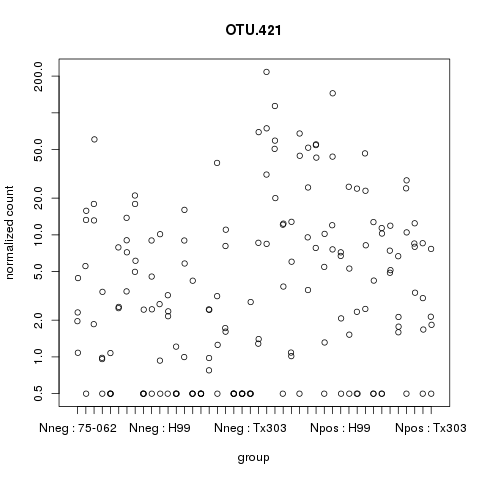

In [11]:
%%R
# plotCounts(dds, gene=which.min(res$padj), intgroup=c("Treatment", "Plant"))

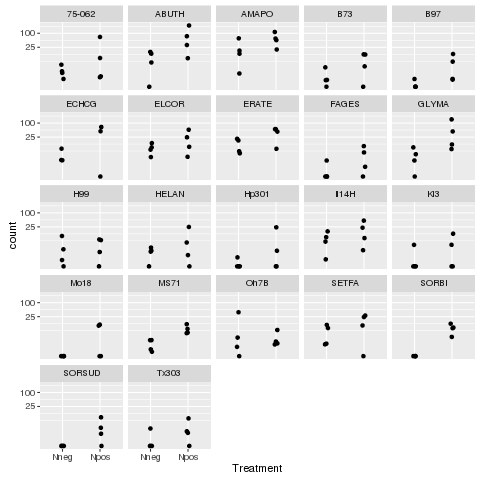

In [12]:
%%R
# d = plotCounts(dds, gene=which.min(res$padj), intgroup=c("Plant","Treatment"), returnData = TRUE)
 

# ggplot(d, aes(x=Treatment, y=count)) +
#   geom_point(position=position_jitter(w=0.1,h=0)) +
#     facet_wrap(~Plant) +
#   scale_y_log10(breaks=c(25,100,400))

## ~PlantRep + Treatment

In [13]:
%%R
# dds = phyloseq_to_deseq2(physeq.plant, ~PlantRep + Treatment)
# d_dds = DESeq(dds, parallel = TRUE)
# resultsNames(d_dds)


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: factor levels were dropped which had no samples

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: NOTE: fitType='parametric', but the dispersion trend was not well captured by the
  function: y = a/x + b, and a local regression fit was automatically substituted.
  specify fitType='local' or 'mean' to avoid this message next time.

  res = super(Function, self).__call__(*new_args, **new_kwargs)


 [1] "Intercept"        "PlantRep1.75.062" "PlantRep2.75.062" "PlantRep3.75.062"
 [5] "PlantRep4.75.062" "PlantRep1.ABUTH"  "PlantRep2.ABUTH"  "PlantRep3.ABUTH" 
 [9] "PlantRep4.ABUTH"  "PlantRep1.AMAPO"  "PlantRep2.AMAPO"  "PlantRep3.AMAPO" 
[13] "PlantRep4.AMAPO"  "PlantRep1.B73"    "PlantRep2.B73"    "PlantRep3.B73"   
[17] "PlantRep4.B73"    "PlantRep1.B97"    "PlantRep2.B97"    "PlantRep3.B97"   
[21] "PlantRep4.B97"    "PlantRep1.ECHCG"  "PlantRep2.ECHCG"  "PlantRep3.ECHCG" 
[25] "PlantRep1.ELCOR"  "PlantRep2.ELCOR"  "PlantRep3.ELCOR"  "PlantRep4.ELCOR" 
[29] "PlantRep1.ERATE"  "PlantRep2.ERATE"  "PlantRep3.ERATE"  "PlantRep4.ERATE" 
[33] "PlantRep1.FAGES"  "PlantRep2.FAGES"  "PlantRep3.FAGES"  "PlantRep4.FAGES" 
[37] "PlantRep1.GLYMA"  "PlantRep2.GLYMA"  "PlantRep3.GLYMA"  "PlantRep4.GLYMA" 
[41] "PlantRep1.H99"    "PlantRep2.H99"    "PlantRep3.H99"    "PlantRep4.H99"   
[45] "PlantRep1.HELAN"  "PlantRep2.HELAN"  "PlantRep3.HELAN"  "PlantRep4.HELAN" 
[49] "PlantRep1.Hp301"  "Pla

In [14]:
%%R
# res = results(d_dds, alpha=0.05, parallel = TRUE)

In [15]:
%%R
# df = as.data.frame(res[, c("baseMean", "log2FoldChange", "pvalue", "padj")])
#     df$OTU = rownames(df)
#     df = df[!is.na(df$padj),]

#     TT = physeq.plant %>% tax_table %>% data.frame
#     TT$OTU = rownames(TT)
#     d = left_join(df, TT, by = 'OTU')
    

# df.sig = d[d$padj <0.05,]
# df.sig %>% arrange(padj) 

      baseMean log2FoldChange       pvalue         padj       OTU    Rank1
1    13.251085      2.0885071 4.067204e-18 9.118671e-15  OTU.7380 Bacteria
2    29.595477      1.1553152 1.359027e-17 1.523469e-14    OTU.92 Bacteria
3    11.352326      1.6458058 1.061747e-15 7.934792e-13   OTU.421 Bacteria
4     7.285241      1.2081368 3.916956e-14 2.195454e-11   OTU.988 Bacteria
5    28.814155      1.0972142 4.476881e-11 2.007433e-08 OTU.10249 Bacteria
6    10.979446      1.2423261 2.101017e-09 7.850799e-07   OTU.442 Bacteria
7     1.265182      1.5142541 3.456617e-09 1.107105e-06  OTU.2231 Bacteria
8     1.960587      1.3210372 4.957367e-09 1.389302e-06  OTU.1130 Bacteria
9    11.298332     -0.4826339 1.266107e-08 3.154014e-06   OTU.226 Bacteria
10   13.258802      0.5782799 1.984365e-08 4.448946e-06   OTU.242 Bacteria
11   43.038375      0.8931523 2.993142e-08 6.100567e-06  OTU.1403 Bacteria
12    3.991401      1.1950933 4.009746e-08 7.491542e-06  OTU.1353 Bacteria
13   16.148713      0.630

# Cycle through dates comparing N fertilization effect

In [20]:
%%R
df = as.data.frame(res[, c("baseMean", "log2FoldChange", "pvalue", "padj")])
    df$OTU = rownames(df)
    df = df[!is.na(df$padj),]

    TT = physeq.plant %>% tax_table %>% data.frame
    TT$OTU = rownames(TT)
    d = left_join(df, TT, by = 'OTU')
    

#df.sig = d[d$padj <0.05,]
#df.sig %>% arrange(padj) 

## Function for generating l2f table

In [31]:
%%R
asNumeric = function(x) { as.numeric(as.character(x)) }

## interested in both organisms that increase or decrease in abundance

get_Ps = function(physeq.obj) {
    diagdds = phyloseq_to_deseq2(physeq.obj, ~Rep + Treatment)
    diagdds = DESeq(diagdds, quiet = TRUE, parallel = TRUE)
    theta = 0
    r = results(diagdds)
    beta = r$log2FoldChange
    betaSE = r$lfcSE
    p = pnorm(beta, theta, betaSE, lower.tail = TRUE)
    r$p = p
    return(r[, c("baseMean", "log2FoldChange", "p")])
}
#Function to trim physeq object to just samples to include in Deseq analysis
# deseq_prune = function(physeq.obj, plant, day) {
#     physeq.md = sample_data(physeq.obj)
#     p = prune_samples((physeq.md$Plant %in% c("BARE", plant))&
#                      (physeq.md$DAP == day), physeq.obj)
#     p.thresh = filter_taxa(p, function(x) sum(x > 0) > 0, TRUE)
#     return(p.thresh)
# }

# l2fc in response to N treatment in bare soils on given sample date, corrected for multiple comparisons

In [34]:
%%R
#code for cycling through bare soils on days
sd = sample_data(physeq.bare)

days = levels(sd$DAP)

res.list = vector("list", length(days))
names(res.list) = as.character(days)
res.list

df_all = data.frame()
df_day = data.frame()

for (day in days) {
#      Sd.d = Sd[Sd$DAP == day,]
#     Sd.d = Sd.d[Sd.d$Plant != "BARE"]
#     Plants = levels(Sd.d$Plant) 
#     #Plants %>% print
    
#     res.list.list = NULL        
#     res.list.list = vector("list", length(Plants))
#     names(res.list) = Plants
    
    
#     for (plant in Plants) {
        DF = NULL
        
        #Trim physeq object by to day  
        p = subset_samples(physeq.bare, DAP == day)
        phy.day = filter_taxa(p, function(x) sum(x > 0) > 0, TRUE)
        sample_data(phy.day)$DAP %>% levels %>% print
          
        

#convert to deseq using function above
        DF = get_Ps(phy.day)
        
        supp = tax_table(phy.day)
            if (!setequal(row.names(DF), row.names(supp))) {
            stop("Ordination and supplementary data indices differ on the following:\n.",
            setdiff(row.names(DF), row.names(supp)))
        }  
   
        DF = data.frame(DF, supp)
        DF$OTU = rownames(DF)
        DF$Day = day
        #DF$Plant = plant
        df_day = rbind(df_day, DF)     
    }

 

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: NOTE: fitType='parametric', but the dispersion trend was not well captured by the
  function: y = a/x + b, and a local regression fit was automatically substituted.
  specify fitType='local' or 'mean' to avoid this message next time.

  res = super(Function, self).__call__(*new_args, **new_kwargs)


[1] "36"
[1] "53"
[1] "57"
[1] "61"
[1] "72"
[1] "79"
[1] "84"
[1] "88"


In [37]:
%%R
df_day$p.adj = p.adjust(df_day$p, "BH")
head(df_day)

           baseMean log2FoldChange          p    Rank1          Rank2
OTU.5899  1.2148555    -0.50707905 0.04976412 Bacteria  Acidobacteria
OTU.8680  5.7985776    -0.16091256 0.35133291 Bacteria  Acidobacteria
OTU.2666  0.6989667    -0.01876803 0.47158235 Bacteria  Acidobacteria
OTU.323  29.6765477    -0.29828632 0.18771371 Bacteria  Acidobacteria
OTU.7636  3.1448462    -0.08935378 0.41269993 Bacteria  Acidobacteria
OTU.1030  7.7065679    -0.37482104 0.18622865 Bacteria Proteobacteria
                       Rank3                Rank4                Rank5
OTU.5899               32-21 uncultured_bacterium                 <NA>
OTU.8680          Holophagae              Sva0725                 <NA>
OTU.2666          Holophagae              Sva0725 uncultured_bacterium
OTU.323           Holophagae              Sva0725                 <NA>
OTU.7636          Holophagae              Sva0725                 <NA>
OTU.1030 Deltaproteobacteria    Desulfobacterales       Nitrospinaceae
             

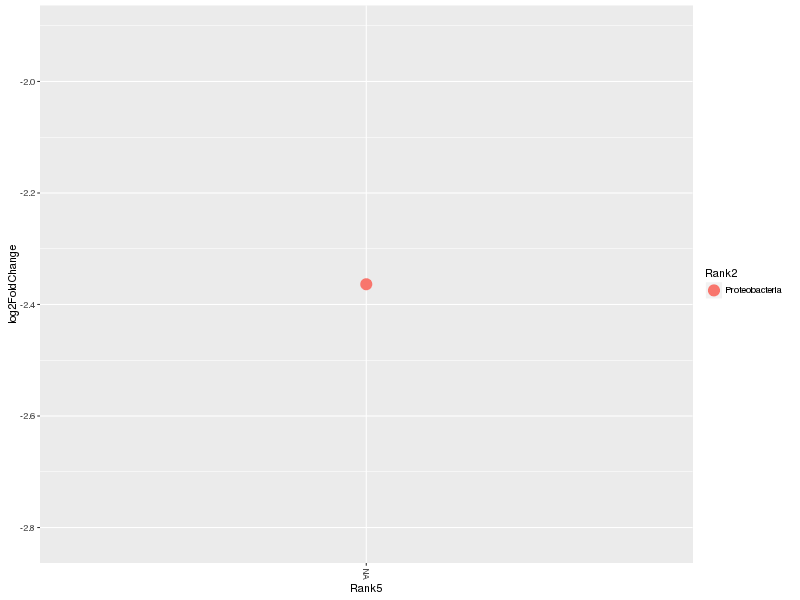

In [41]:
%%R -w 800 -h 600
sigtab = df_day[df_day$p.adj < .05,]
x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
x = sort(x, TRUE)
sigtab$Rank2 = factor(as.character(sigtab$Rank2), levels=names(x))
x = tapply(sigtab$log2FoldChange, sigtab$Rank5, function(x) max(x))
x = sort(x, TRUE)
sigtab$Rank5 = factor(as.character(sigtab$Rank5), levels=names(x))
    
ggplot(sigtab, aes(x=Rank5, y=log2FoldChange, color=Rank2)) + geom_point(size=5) + 
  theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))
#x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
#x = sort(x, TRUE)
#x

In [42]:
%%R
head(sigtab)

          baseMean log2FoldChange            p    Rank1          Rank2
OTU.20810  30.8218      -2.363619 1.066893e-08 Bacteria Proteobacteria
                       Rank3            Rank4 Rank5 Rank6 Rank7 Rank8     OTU
OTU.20810 Betaproteobacteria Nitrosomonadales  <NA>  <NA>  <NA>  <NA> OTU.208
          Day       p.adj
OTU.20810  53 0.000392638


### Notes: One beta-proteobacterial nitrosomonadales OTU is significantly decreased in abundance in bare soil plots after correction for multiple comparisons

In [44]:
%%R
##Function for generating l2f estimates
## interested in both organisms that increase or decrease in abundance

get_Ps = function(physeq.obj) {
    diagdds = phyloseq_to_deseq2(physeq.obj, ~Rep + InorganicN)
    diagdds = DESeq(diagdds, quiet = TRUE, parallel = TRUE)
    theta = 0
    r = results(diagdds)
    beta = r$log2FoldChange
    betaSE = r$lfcSE
    p = pnorm(beta, theta, betaSE, lower.tail = TRUE)
    r$p = p
    return(r[, c("baseMean", "log2FoldChange", "p")])
    }
    
#code for cycling through bare soils on days
phy = subset_samples(physeq.bare, !is.na(InorganicN))
sd = sample_data(phy)

days = levels(sd$DAP)

res.list = vector("list", length(days))
names(res.list) = as.character(days)
res.list

df_all = data.frame()
df_day = data.frame()

for (day in days) {
#      Sd.d = Sd[Sd$DAP == day,]
#     Sd.d = Sd.d[Sd.d$Plant != "BARE"]
#     Plants = levels(Sd.d$Plant) 
#     #Plants %>% print
    
#     res.list.list = NULL        
#     res.list.list = vector("list", length(Plants))
#     names(res.list) = Plants
    
    
#     for (plant in Plants) {
        DF = NULL
        
        #Trim physeq object by to day  
        p = subset_samples(phy, DAP == day)
        phy.day = filter_taxa(p, function(x) sum(x > 0) > 0, TRUE)
        sample_data(phy.day)$DAP %>% levels %>% print
          
        

#convert to deseq using function above
        DF = get_Ps(phy.day)
        
        supp = tax_table(phy.day)
            if (!setequal(row.names(DF), row.names(supp))) {
            stop("Ordination and supplementary data indices differ on the following:\n.",
            setdiff(row.names(DF), row.names(supp)))
        }  
   
        DF = data.frame(DF, supp)
        DF$OTU = rownames(DF)
        DF$Day = day
        #DF$Plant = plant
        df_day = rbind(df_day, DF)     
    }

 

[1] "36"
[1] "53"
[1] "57"
[1] "61"
[1] "72"
[1] "79"


In [45]:
%%R
df_day$p.adj = p.adjust(df_day$p, "BH")
head(df_day)

           baseMean log2FoldChange          p    Rank1          Rank2
OTU.5899  1.2148555   -0.050225242 0.12098357 Bacteria  Acidobacteria
OTU.8680  5.7985776   -0.047046959 0.22172053 Bacteria  Acidobacteria
OTU.2666  0.6989667   -0.020189784 0.29570992 Bacteria  Acidobacteria
OTU.323  29.6765477   -0.075720527 0.08368238 Bacteria  Acidobacteria
OTU.7636  3.1448462   -0.009754204 0.43392757 Bacteria  Acidobacteria
OTU.1030  7.7065679   -0.091541127 0.07263691 Bacteria Proteobacteria
                       Rank3                Rank4                Rank5
OTU.5899               32-21 uncultured_bacterium                 <NA>
OTU.8680          Holophagae              Sva0725                 <NA>
OTU.2666          Holophagae              Sva0725 uncultured_bacterium
OTU.323           Holophagae              Sva0725                 <NA>
OTU.7636          Holophagae              Sva0725                 <NA>
OTU.1030 Deltaproteobacteria    Desulfobacterales       Nitrospinaceae
             

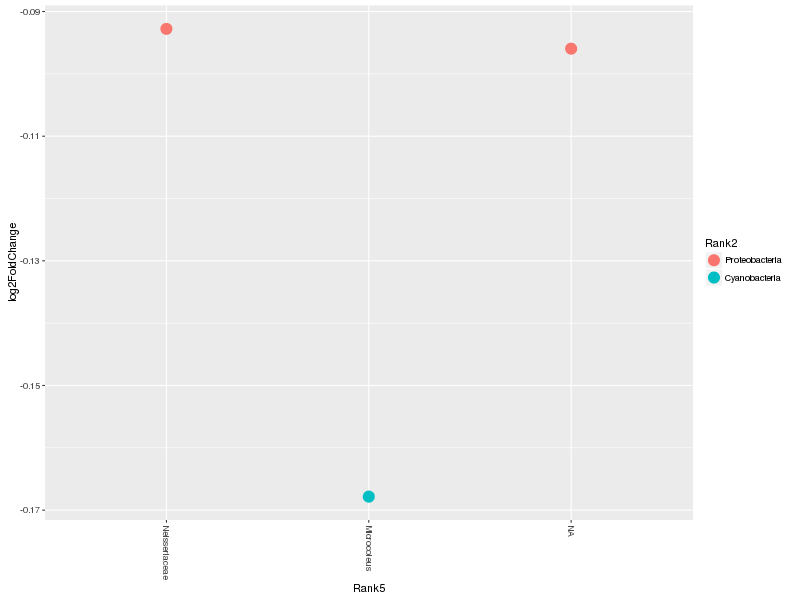

In [46]:
%%R -w 800 -h 600
sigtab = df_day[df_day$p.adj < .05,]
x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
x = sort(x, TRUE)
sigtab$Rank2 = factor(as.character(sigtab$Rank2), levels=names(x))
x = tapply(sigtab$log2FoldChange, sigtab$Rank5, function(x) max(x))
x = sort(x, TRUE)
sigtab$Rank5 = factor(as.character(sigtab$Rank5), levels=names(x))
    
ggplot(sigtab, aes(x=Rank5, y=log2FoldChange, color=Rank2)) + geom_point(size=5) + 
  theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))
#x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
#x = sort(x, TRUE)
#x

In [48]:
%%R
head(sigtab)

          baseMean log2FoldChange            p    Rank1          Rank2
OTU.20810 30.82180    -0.09595597 5.499605e-10 Bacteria Proteobacteria
OTU.2717  49.89451    -0.09277762 1.233003e-09 Bacteria Proteobacteria
OTU.13315 88.41453    -0.16782972 4.632246e-09 Bacteria  Cyanobacteria
                       Rank3            Rank4         Rank5     Rank6
OTU.20810 Betaproteobacteria Nitrosomonadales          <NA>      <NA>
OTU.2717  Betaproteobacteria     Neisseriales Neisseriaceae Vogesella
OTU.13315      SubsectionIII          FamilyI   Microcoleus      <NA>
                         Rank7 Rank8     OTU Day        p.adj
OTU.20810                 <NA>  <NA> OTU.208  53 1.568157e-05
OTU.2717  uncultured_bacterium  <NA> OTU.271  53 1.757893e-05
OTU.13315                 <NA>  <NA> OTU.133  61 4.402796e-05


# Resume here, test each plant to find OTUs responding to fertilization treatment

In [73]:
%%R
asNumeric = function(x) { as.numeric(as.character(x)) }

## interested in both organisms that increase or decrease in abundance

    get_Ps = function(physeq.obj) {
        diagdds = phyloseq_to_deseq2(physeq.obj, ~Rep + Treatment)
        diagdds = DESeq(diagdds, quiet = TRUE, parallel = TRUE)
        r = results(diagdds)
        return(r[, c("baseMean", "log2FoldChange", "pvalue", "padj")])
    }
#Function to trim physeq object to just samples to include in Deseq analysis
    deseq_prune = function(physeq.obj, plant, day) {
        physeq.md = sample_data(physeq.obj)
        p = prune_samples(physeq.md$Plant == plant, physeq.obj)
        
#         p = prune_samples((physeq.md$Plant %in% c("BARE", plant))&
#                          (physeq.md$DAP == day), physeq.obj)
        p.thresh = filter_taxa(p, function(x) sum(x > 0) > 0, TRUE)
        return(p.thresh)
    }

                           
#code for cycling through plants
sd = sample_data(physeq.plant)

# days = levels(Sd$DAP)

# res.list = vector("list", length(days))
# names(res.list) = as.character(days)
# res.list

df_plant = data.frame()

# for (day in days) {
#      Sd.d = Sd[Sd$DAP == day,]
#     Sd.d = Sd.d[Sd.d$Plant != "BARE"]
    Plants = levels(sd$Plant) 
    Plants %>% print
    
#     res.list.list = NULL        
#     res.list.list = vector("list", length(Plants))
#     names(res.list) = Plants
    
    
    for (plant in Plants) {
        DF = NULL
        
        #Trim physeq object by to day-plant combo 
        phy = deseq_prune(physeq.plant, plant, day)
        
        #re-order levels 
        #sample_data(phy)$Plant = relevel(sample_data(phy)$Plant, "BARE")
        
        #convert to deseq using function above
        DF = get_Ps(phy)
        
        supp = tax_table(phy)
            if (!setequal(row.names(DF), row.names(supp))) {
            stop("Ordination and supplementary data indices differ on the following:\n.",
            setdiff(row.names(DF), row.names(supp)))
        }  
   
        DF = data.frame(DF, supp)
        DF$OTU = rownames(DF)
        #DF$Day = day
        DF$Plant = plant
        df_plant = rbind(df_plant, DF)     
    }

 

 [1] "75-062" "ABUTH"  "AMAPO"  "B73"    "B97"    "ECHCG"  "ELCOR"  "ERATE" 
 [9] "FAGES"  "GLYMA"  "H99"    "HELAN"  "Hp301"  "Il14H"  "Ki3"    "Mo18"  
[17] "MS71"   "Oh7B"   "SETFA"  "SORBI"  "SORSUD" "Tx303" 


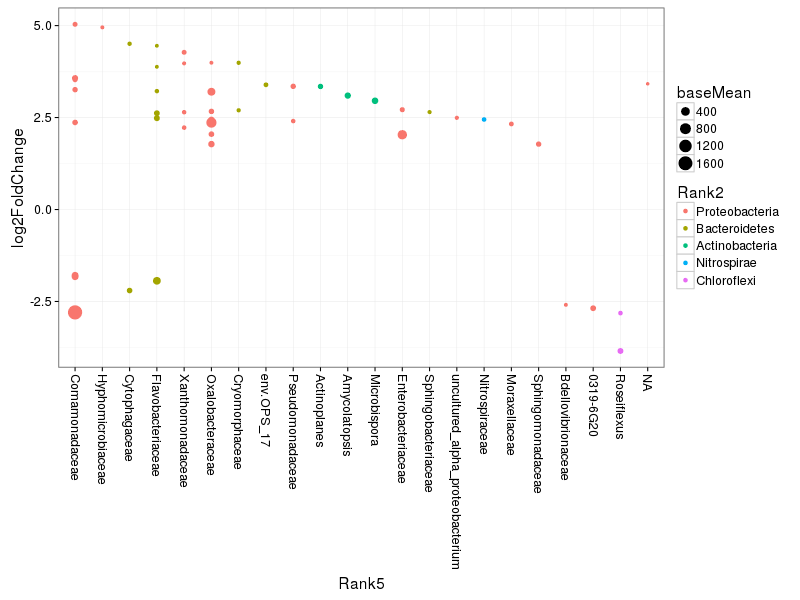

In [95]:
%%R -w 800 -h 600
sigtab = df_plant %>% filter(padj < 0.05)
x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
x = sort(x, TRUE)
sigtab$Rank2 = factor(as.character(sigtab$Rank2), levels=names(x))
x = tapply(sigtab$log2FoldChange, sigtab$Rank5, function(x) max(x))
x = sort(x, TRUE)
sigtab$Rank5 = factor(as.character(sigtab$Rank5), levels=names(x))
    
ggplot(sigtab, aes(x=Rank5, y=log2FoldChange, color=Rank2, size = baseMean)) + 
    geom_point() +
    theme_bw(base_size = 16) +
  theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))
#x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
#x = sort(x, TRUE)
#x

In [97]:
%%R
filter(sigtab, log2FoldChange < 0)

     baseMean log2FoldChange       pvalue         padj    Rank1          Rank2
1   273.86203      -1.936450 6.947040e-05 1.493614e-02 Bacteria  Bacteroidetes
2    92.82491      -3.843780 8.113883e-07 1.521792e-04 Bacteria    Chloroflexi
3    27.96227      -2.815107 2.764902e-05 3.322491e-03 Bacteria    Chloroflexi
4    85.96123      -2.683032 5.462822e-04 4.376328e-02 Bacteria Proteobacteria
5    72.24135      -2.201470 1.844586e-05 2.257312e-03 Bacteria  Bacteroidetes
6   169.39600      -1.826113 8.705894e-04 4.735039e-02 Bacteria Proteobacteria
7    98.29445      -1.813879 2.230665e-04 1.679863e-02 Bacteria Proteobacteria
8   166.56767      -1.785566 2.788964e-04 1.950282e-02 Bacteria Proteobacteria
9  1692.76555      -2.795317 1.883618e-12 1.844062e-09 Bacteria Proteobacteria
10   48.94033      -2.712245 8.934403e-06 1.457797e-03 Bacteria Proteobacteria
11   12.34354      -2.590642 5.905987e-04 3.854641e-02 Bacteria Proteobacteria
                 Rank3             Rank4            

In [92]:
%%R
sigtab$OTU %>% unique %>% length

[1] 43


Notes
* when cycling through each plant without independent filtering and correcting for all comparisons only two OTUs are significantly influenced by N treatment
* when cycling through the plants with independent filtering and without correcting for multiple comparisons because multiple plants are tested, 43 OTUs shift

# Inorganic N responders by genotype

In [98]:
%%R
asNumeric = function(x) { as.numeric(as.character(x)) }

## interested in both organisms that increase or decrease in abundance

    get_Ps = function(physeq.obj) {
        diagdds = phyloseq_to_deseq2(physeq.obj, ~Rep + InorganicN)
        diagdds = DESeq(diagdds, quiet = TRUE, parallel = TRUE)
        r = results(diagdds)
        return(r[, c("baseMean", "log2FoldChange", "pvalue", "padj")])
    }
#Function to trim physeq object to just samples to include in Deseq analysis
    deseq_prune = function(physeq.obj, plant, day) {
        physeq.md = sample_data(physeq.obj)
        p = prune_samples(physeq.md$Plant == plant, physeq.obj)
        
#         p = prune_samples((physeq.md$Plant %in% c("BARE", plant))&
#                          (physeq.md$DAP == day), physeq.obj)
        p.thresh = filter_taxa(p, function(x) sum(x > 0) > 0, TRUE)
        return(p.thresh)
    }

                           
#code for cycling through plants

physeq = subset_samples(physeq.plant, !is.na(InorganicN))

sd = sample_data(physeq)

# days = levels(Sd$DAP)

# res.list = vector("list", length(days))
# names(res.list) = as.character(days)
# res.list

df_plant = data.frame()

# for (day in days) {
#      Sd.d = Sd[Sd$DAP == day,]
#     Sd.d = Sd.d[Sd.d$Plant != "BARE"]
    Plants = levels(sd$Plant) 
    Plants %>% print
    
#     res.list.list = NULL        
#     res.list.list = vector("list", length(Plants))
#     names(res.list) = Plants
    
    
    for (plant in Plants) {
        DF = NULL
        
        #Trim physeq object by to day-plant combo 
        phy = deseq_prune(physeq, plant, day)
        
        #re-order levels 
        #sample_data(phy)$Plant = relevel(sample_data(phy)$Plant, "BARE")
        
        #convert to deseq using function above
        DF = get_Ps(phy)
        
        supp = tax_table(phy)
            if (!setequal(row.names(DF), row.names(supp))) {
            stop("Ordination and supplementary data indices differ on the following:\n.",
            setdiff(row.names(DF), row.names(supp)))
        }  
   
        DF = data.frame(DF, supp)
        DF$OTU = rownames(DF)
        #DF$Day = day
        DF$Plant = plant
        df_plant = rbind(df_plant, DF)     
    }

 

 [1] "75-062" "ABUTH"  "AMAPO"  "B97"    "ECHCG"  "ERATE"  "FAGES"  "GLYMA" 
 [9] "MS71"   "Oh7B"   "SETFA" 


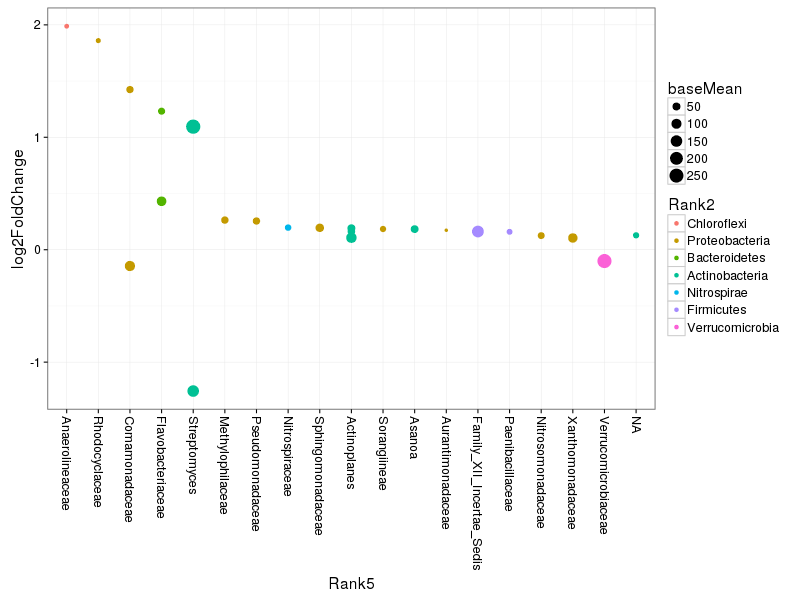

In [99]:
%%R -w 800 -h 600
sigtab = df_plant %>% filter(padj < 0.05)
x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
x = sort(x, TRUE)
sigtab$Rank2 = factor(as.character(sigtab$Rank2), levels=names(x))
x = tapply(sigtab$log2FoldChange, sigtab$Rank5, function(x) max(x))
x = sort(x, TRUE)
sigtab$Rank5 = factor(as.character(sigtab$Rank5), levels=names(x))
    
ggplot(sigtab, aes(x=Rank5, y=log2FoldChange, color=Rank2, size = baseMean)) + 
    geom_point() +
    theme_bw(base_size = 16) +
  theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))
#x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
#x = sort(x, TRUE)
#x

In [100]:
%%R
filter(sigtab, log2FoldChange < 0)

  baseMean log2FoldChange       pvalue         padj    Rank1           Rank2
1 152.6041     -1.2570949 1.970287e-05 0.0095657425 Bacteria  Actinobacteria
2 104.9347     -0.1446169 1.689703e-06 0.0006708121 Bacteria  Proteobacteria
3 255.3294     -0.1007197 5.138946e-04 0.0366446414 Bacteria Verrucomicrobia
               Rank3              Rank4               Rank5         Rank6
1   Streptomycetales  Streptomycetaceae        Streptomyces          <NA>
2 Betaproteobacteria    Burkholderiales      Comamonadaceae    uncultured
3   Verrucomicrobiae Verrucomicrobiales Verrucomicrobiaceae Luteolibacter
                 Rank7 Rank8      OTU Plant
1                 <NA>  <NA> OTU.9177   B97
2                 <NA>  <NA>    OTU.7 ECHCG
3 uncultured_bacterium  <NA>   OTU.15 FAGES


In [92]:
%%R
sigtab$OTU %>% unique %>% length

[1] 43


Notes
* when cycling through each plant without independent filtering and correcting for all comparisons only two OTUs are significantly influenced by N treatment
* when cycling through the plants with independent filtering and without correcting for multiple comparisons because multiple plants are tested, 43 OTUs shift

# Rhizosphere inorganic N responders

## Rhizosphere inorganic N responders within maize

In [107]:
%%R

## interested in both organisms that increase or decrease in abundance
phy.maize = subset_samples(physeq.Full, Type == "Maize" & !is.na(InorganicN))

diagdds = phyloseq_to_deseq2(phy.maize, ~Plant + InorganicN)
diagdds = DESeq(diagdds, quiet = TRUE, parallel = TRUE)
DF = results(diagdds)
       

supp = tax_table(phy.maize)
            if (!setequal(row.names(DF), row.names(supp))) {
            stop("Ordination and supplementary data indices differ on the following:\n.",
            setdiff(row.names(DF), row.names(supp)))
        }  

        DF = data.frame(DF, supp)
        DF$OTU = rownames(DF)

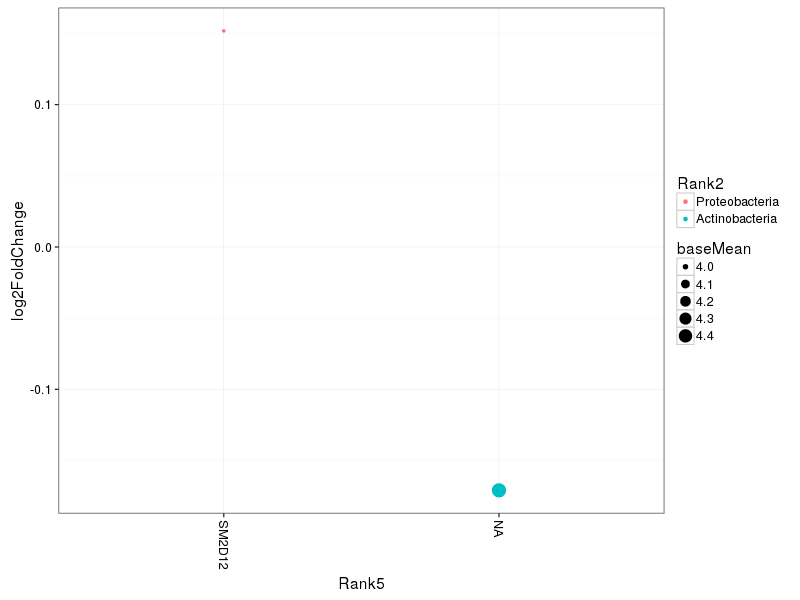

In [112]:
%%R -w 800 -h 600
sigtab = DF %>% filter(padj < 0.1)
x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
x = sort(x, TRUE)
sigtab$Rank2 = factor(as.character(sigtab$Rank2), levels=names(x))
x = tapply(sigtab$log2FoldChange, sigtab$Rank5, function(x) max(x))
x = sort(x, TRUE)
sigtab$Rank5 = factor(as.character(sigtab$Rank5), levels=names(x))
    
ggplot(sigtab, aes(x=Rank5, y=log2FoldChange, color=Rank2, size = baseMean)) + 
    geom_point() +
    theme_bw(base_size = 16) +
  theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))
#x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
#x = sort(x, TRUE)
#x

In [114]:
%%R
sigtab

  baseMean log2FoldChange      lfcSE      stat       pvalue       padj    Rank1
1 4.473323     -0.1709687 0.04125625 -4.144067 3.412001e-05 0.05947119 Bacteria
2 3.983150      0.1518227 0.03907758  3.885161 1.022623e-04 0.08912159 Bacteria
           Rank2               Rank3                      Rank4  Rank5 Rank6
1 Actinobacteria           MB-A2-108 uncultured_actinobacterium   <NA>  <NA>
2 Proteobacteria Alphaproteobacteria              Rickettsiales SM2D12  <NA>
  Rank7 Rank8      OTU
1  <NA>  <NA>  OTU.733
2  <NA>  <NA> OTU.1737


## Within annuals

In [123]:
%%R

## interested in both organisms that increase or decrease in abundance
phy = subset_samples(physeq.Full, Type != "Maize" & Type != "BARE" & !is.na(InorganicN))

diagdds = phyloseq_to_deseq2(phy, ~Plant + InorganicN)
diagdds = DESeq(diagdds, quiet = TRUE, parallel = TRUE)
res = results(diagdds)
DF = res

supp = tax_table(phy)
            if (!setequal(row.names(DF), row.names(supp))) {
            stop("Ordination and supplementary data indices differ on the following:\n.",
            setdiff(row.names(DF), row.names(supp)))
        }  

        DF = data.frame(DF, supp)
        DF$OTU = rownames(DF)

In [126]:
%%R
summary(res)


out of 4964 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)     : 32, 0.64% 
LFC < 0 (down)   : 37, 0.75% 
outliers [1]     : 0, 0% 
low counts [2]   : 3970, 80% 
(mean count < 3.3)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



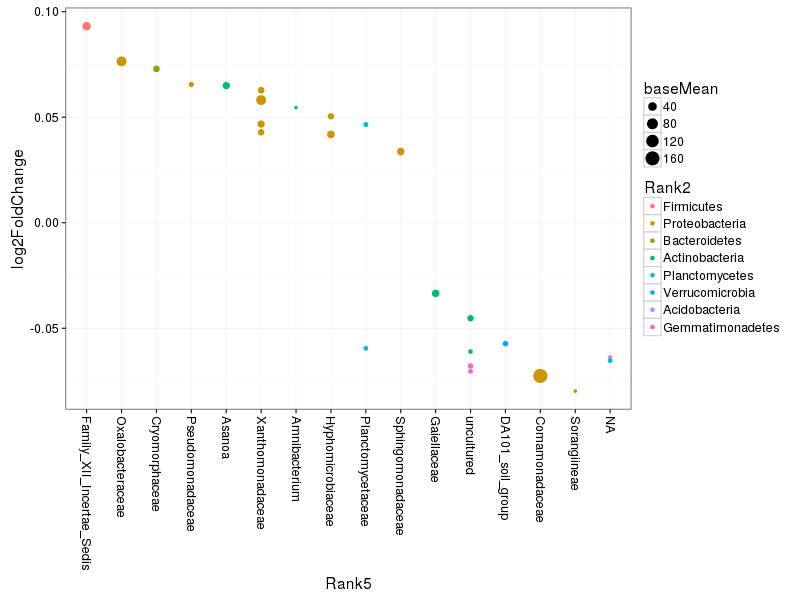

In [116]:
%%R -w 800 -h 600
sigtab = DF %>% filter(padj < 0.05)
x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
x = sort(x, TRUE)
sigtab$Rank2 = factor(as.character(sigtab$Rank2), levels=names(x))
x = tapply(sigtab$log2FoldChange, sigtab$Rank5, function(x) max(x))
x = sort(x, TRUE)
sigtab$Rank5 = factor(as.character(sigtab$Rank5), levels=names(x))
    
ggplot(sigtab, aes(x=Rank5, y=log2FoldChange, color=Rank2, size = baseMean)) + 
    geom_point() +
    theme_bw(base_size = 16) +
  theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))
#x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
#x = sort(x, TRUE)
#x

In [117]:
%%R
sigtab

     baseMean log2FoldChange       lfcSE      stat       pvalue         padj
1    3.938368    -0.06372359 0.018887421 -3.373864 7.412104e-04 0.0350839590
2    8.906531    -0.05730635 0.016697050 -3.432124 5.988733e-04 0.0297904146
3    5.637710    -0.06537176 0.018836348 -3.470512 5.194680e-04 0.0286861793
4    6.918323     0.04652756 0.014262198  3.262299 1.105124e-03 0.0439397394
5    5.996461    -0.05946675 0.018063053 -3.292176 9.941537e-04 0.0427126878
6   16.802710     0.07289361 0.019135589  3.809321 1.393487e-04 0.0125920543
7    5.760424    -0.07040450 0.019996478 -3.520845 4.301740e-04 0.0266997052
8    9.115674    -0.06784742 0.019357413 -3.504984 4.566348e-04 0.0266997052
9   37.401835     0.09313377 0.019602846  4.751033 2.023801e-06 0.0006705526
10  23.417062     0.06496527 0.014957511  4.343321 1.403446e-05 0.0027900511
11   3.392303     0.05454172 0.015341469  3.555182 3.777172e-04 0.0266997052
12  14.761061    -0.04528320 0.013194852 -3.431884 5.994047e-04 0.0297904146

In [133]:
%%R
str(res)
plotMA(res$listData)

Formal class 'DESeqResults' [package "DESeq2"] with 6 slots
  ..@ rownames       : chr [1:4982] "OTU.5899" "OTU.8680" "OTU.2666" "OTU.323" ...
  ..@ nrows          : int 4982
  ..@ listData       :List of 6
  .. ..$ baseMean      : num [1:4982] 0.216 2.38 0.722 7.292 1.097 ...
  .. ..$ log2FoldChange: num [1:4982] 0.00395 -0.04258 0.01156 -0.04942 0.00194 ...
  .. ..$ lfcSE         : num [1:4982] 0.0172 0.0197 0.0202 0.0169 0.02 ...
  .. ..$ stat          : num [1:4982] 0.2293 -2.1631 0.5735 -2.923 0.0973 ...
  .. ..$ pvalue        : num [1:4982] 0.8186 0.03054 0.5663 0.00347 0.92252 ...
  .. ..$ padj          : num [1:4982] NA NA NA 0.0749 NA ...
  ..@ elementType    : chr "ANY"
  ..@ elementMetadata:Formal class 'DataFrame' [package "S4Vectors"] with 6 slots
  .. .. ..@ rownames       : NULL
  .. .. ..@ nrows          : int 6
  .. .. ..@ listData       :List of 2
  .. .. .. ..$ type       : chr [1:6] "intermediate" "results" "results" "results" ...
  .. .. .. ..$ description: chr [1:

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in array(x, c(length(x), 1L), if (!is.null(names(x))) list(names(x),  : 
  'data' must be of a vector type, was 'NULL'

  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [131]:
%%R
rtemp = results(diagdds, contrast = c("PlantABUTH", "InorganicN", "InorganicN"))
plotMA(rtemp)


Error in cleanContrast(object, contrast, expanded = isExpanded, listValues = listValues,  : 
  InorganicN and InorganicN should be different level names


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in cleanContrast(object, contrast, expanded = isExpanded, listValues = listValues,  : 
  InorganicN and InorganicN should be different level names

  res = super(Function, self).__call__(*new_args, **new_kwargs)


Notes
* No significant responders at padj < 0.05 within maize
* 26 responders within annuals

## Bare plots ~DAP*Rep + Treatment

In [16]:
%%R
bare_dds = phyloseq_to_deseq2(physeq.bare, ~DAP*Rep + Treatment)
bare_d_dds = DESeq(bare_dds, parallel = TRUE)
resultsNames(bare_d_dds)


 [1] "Intercept"     "DAP36"         "DAP53"         "DAP57"        
 [5] "DAP61"         "DAP72"         "DAP79"         "DAP84"        
 [9] "DAP88"         "Rep1"          "Rep2"          "Rep3"         
[13] "Rep4"          "TreatmentNneg" "TreatmentNpos" "DAP36.Rep1"   
[17] "DAP53.Rep1"    "DAP57.Rep1"    "DAP61.Rep1"    "DAP72.Rep1"   
[21] "DAP79.Rep1"    "DAP84.Rep1"    "DAP88.Rep1"    "DAP36.Rep2"   
[25] "DAP53.Rep2"    "DAP57.Rep2"    "DAP61.Rep2"    "DAP72.Rep2"   
[29] "DAP79.Rep2"    "DAP84.Rep2"    "DAP88.Rep2"    "DAP36.Rep3"   
[33] "DAP53.Rep3"    "DAP57.Rep3"    "DAP61.Rep3"    "DAP72.Rep3"   
[37] "DAP79.Rep3"    "DAP84.Rep3"    "DAP88.Rep3"    "DAP36.Rep4"   
[41] "DAP53.Rep4"    "DAP57.Rep4"    "DAP61.Rep4"    "DAP72.Rep4"   
[45] "DAP79.Rep4"    "DAP84.Rep4"    "DAP88.Rep4"   


In [17]:
%%R
res = results(bare_d_dds, alpha = 0.1, parallel = TRUE)
summary(res)


out of 4928 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)     : 0, 0% 
LFC < 0 (down)   : 0, 0% 
outliers [1]     : 0, 0% 
low counts [2]   : 0, 0% 
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



* Not a single OTU is significantly enriched overall in bare soils with N treatment

## Bare ~ DAP:Rep + DAP:Treatment

In [18]:
%%R
bare_dds = phyloseq_to_deseq2(physeq.bare, ~Rep + DAP + DAP:Treatment)
bare_d_dds = DESeq(bare_dds, parallel = TRUE)
resultsNames(bare_d_dds)


 [1] "Intercept"           "Rep1"                "Rep2"               
 [4] "Rep3"                "Rep4"                "DAP36"              
 [7] "DAP53"               "DAP57"               "DAP61"              
[10] "DAP72"               "DAP79"               "DAP84"              
[13] "DAP88"               "DAP36.TreatmentNneg" "DAP53.TreatmentNneg"
[16] "DAP57.TreatmentNneg" "DAP61.TreatmentNneg" "DAP72.TreatmentNneg"
[19] "DAP79.TreatmentNneg" "DAP84.TreatmentNneg" "DAP88.TreatmentNneg"
[22] "DAP36.TreatmentNpos" "DAP53.TreatmentNpos" "DAP57.TreatmentNpos"
[25] "DAP61.TreatmentNpos" "DAP72.TreatmentNpos" "DAP79.TreatmentNpos"
[28] "DAP84.TreatmentNpos" "DAP88.TreatmentNpos"


In [19]:
%%R
res = results(bare_d_dds, alpha = 0.05, parallel = TRUE, contrast = c("Treatment", "Npos", "Nneg"))
summary(res)


Error in do.call(rbind, bplapply(levels(idx), function(l) { : 
  error in evaluating the argument 'args' in selecting a method for function 'do.call': Error: 20 errors; first error:
  Error in cleanContrast(object[idx == l, , drop = FALSE], contrast, expanded = isExpanded, : TreatmentNpos and TreatmentNneg are expected to be in resultsNames(object)

For more information, use bplasterror(). To resume calculation, re-call
  the function and set the argument 'BPRESUME' to TRUE or wrap the
  previous call in bpresume().

First traceback:
  32: (structure(function (expr, envir = parent.frame(), enclos = if (is.list(envir) || 
          is.pairlist(envir)) parent.frame() else baseenv()) 
      {
          force(envir)
          force(enclos)
          standardGeneric("eval")
      }, generic = structure("eval", package = "BiocGenerics"), package = "BiocGenerics", group = list(), valueClass = character(0), signature = c("expr", 
      "envir"), default = structure(function (expr, envir = par

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Warning messages:

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 1: replacing previous import by ‘ggplot2::Position’ when loading ‘DESeq2’ 

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 2: replacing previous import by ‘scales::alpha’ when loading ‘phyloseq’ 

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in do.call(rbind, bplapply(levels(idx), function(l) { : 
  error in evaluating the argument 'args' in selecting a method for function 'do.call': Error: 20 errors; first error:
  Error in cleanContrast(object[idx == l, , drop = FALSE], contrast, expanded = isExpanded, : TreatmentNpos a

In [20]:
%%R
df = as.data.frame(res[, c("baseMean", "log2FoldChange", "pvalue", "padj")])
    df$OTU = rownames(df)
    df = df[!is.na(df$padj),]

    TT = physeq.plant %>% tax_table %>% data.frame
    TT$OTU = rownames(TT)
    d = left_join(df, TT, by = 'OTU')
    

#df.sig = d[d$padj <0.05,]
#df.sig %>% arrange(padj) 

In [22]:
%%R
asNumeric = function(x) { as.numeric(as.character(x)) }

## interested in both organisms that increase or decrease in abundance
get_Ps = function(physeq.obj, l2fc_threshold) {
    diagdds = phyloseq_to_deseq2(physeq.obj, ~Rep + Treatment)
    diagdds = DESeq(diagdds, quiet = TRUE, parallel = TRUE)
    r = results(diagdds, lfcThreshold = l2fc_threshold, independentFiltering = TRUE)
    df = as.data.frame(res[, c("baseMean", "log2FoldChange", "pvalue", "padj")])
    df$OTU = rownames(df)

    TT = physeq.obj %>% tax_table %>% data.frame
    TT$OTU = rownames(TT)
    d = left_join(df, TT, c('OTU'))
    return(d)
}

#Function to trim physeq object to just samples to include in Deseq analysis
deseq_prune = function(physeq.obj, plant, day) {
    physeq.md = sample_data(physeq.obj)
    p = prune_samples((physeq.md$Plant %in% c("BARE", plant))&
                     (physeq.md$DAP == day), physeq.obj)
    p.thresh = filter_taxa(p, function(x) sum(x > 0) > 0, TRUE)
    return(p.thresh)
}

## Define deseq object Full dataset

In [23]:
%%R
diagdds = phyloseq_to_deseq2(physeq, ~DAP + PlantRep + Treatment)
diagdds = DESeq(diagdds, quiet = TRUE, parallel = TRUE)


Error in sample_data(physeq, FALSE) : 
  error in evaluating the argument 'object' in selecting a method for function 'sample_data': Error: object 'physeq' not found


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in sample_data(physeq, FALSE) : 
  error in evaluating the argument 'object' in selecting a method for function 'sample_data': Error: object 'physeq' not found

  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [ ]:
%%R
res = results(diagdds, parallel = TRUE, independentFiltering = TRUE)

In [ ]:
%%R    
    theta = 0.5
    beta = res$log2FoldChange
    betaSE = res$lfcSE
    p = pnorm(beta, theta, betaSE, lower.tail = FALSE)
    res$p = p
    df = as.data.frame(res[, c("baseMean", "log2FoldChange", "p")])
    df$p.adj = p.adjust(df$p, "BH")

df$OTU = rownames(df)

    TT = physeq.Full %>% tax_table %>% data.frame
    TT$OTU = rownames(TT)
    d = left_join(df, TT, c('OTU'))
    d %>% head %>% print

In [ ]:
%%R
summary(res)

### Model only results in one marginally significant OTU - 
Proteobacteria Betaproteobacteria Burkholderiales Comamonadaceae

## Deseq analysis on just the plants

Note that model with DAP is not full rank so it cannot run with DAP as a controlling factor

In [ ]:
%%R
diagdds = phyloseq_to_deseq2(physeq.plant, ~ PlantRep + Treatment)
diagdds = DESeq(diagdds, quiet = TRUE, parallel = TRUE)

In [ ]:
%%R
res = results(diagdds, parallel = TRUE, independentFiltering = TRUE)

In [ ]:
%%R
summary(res)

In [ ]:
%%R    
    theta = 0.5
    beta = res$log2FoldChange
    betaSE = res$lfcSE
    p = pnorm(beta, theta, betaSE, lower.tail = FALSE)
    res$p = p
    df = as.data.frame(res[, c("baseMean", "log2FoldChange", "p")])
    df$p.adj = p.adjust(df$p, "BH")

df$OTU = rownames(df)

    TT = physeq.Full %>% tax_table %>% data.frame
    TT$OTU = rownames(TT)
    d = left_join(df, TT, c('OTU'))
    d %>% head %>% print

In [ ]:
%%R -w 800 -h 600
sigtab = d[d$p.adj < .05,]
x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
x = sort(x, TRUE)
sigtab$Rank2 = factor(as.character(sigtab$Rank2), levels=names(x))
x = tapply(sigtab$log2FoldChange, sigtab$Rank5, function(x) max(x))
x = sort(x, TRUE)
sigtab$Rank5 = factor(as.character(sigtab$Rank5), levels=names(x))
    
ggplot(sigtab, aes(x=Rank5, y=log2FoldChange, color=Rank2)) + geom_point(size=5) + 
  theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))
#x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
#x = sort(x, TRUE)
#x

## Create Deseq object for just the bare soils

In [ ]:
%%R
## Create phyloseq object on subset of samples
physeq.bare = subset_samples(physeq.Full, Plant == "BARE")
sample_data(physeq.bare)$DAPRep = interaction(sample_data(physeq.bare)$DAP, sample_data(physeq.bare)$Rep)

In [ ]:
%%R
diagdds = phyloseq_to_deseq2(physeq.bare, ~ DAPRep + Treatment)
diagdds = DESeq(diagdds, quiet = TRUE, parallel = TRUE)

In [ ]:
%%R
res = results(diagdds, parallel = TRUE, independentFiltering = TRUE)

In [ ]:
%%R
summary(res)

In [ ]:
%%R    
    theta = 0.0
    beta = res$log2FoldChange
    betaSE = res$lfcSE
    p = pnorm(beta, theta, betaSE, lower.tail = FALSE)
    res$p = p
    df = as.data.frame(res[, c("baseMean", "log2FoldChange", "p")])
    df$p.adj = p.adjust(df$p, "BH")

df$OTU = rownames(df)

    TT = physeq.Full %>% tax_table %>% data.frame
    TT$OTU = rownames(TT)
    d = left_join(df, TT, c('OTU'))
    d %>% head %>% print

In [ ]:
%%R
sigtab

In [ ]:
%%R -w 800 -h 600
sigtab = d[d$p.adj < .05,]
x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
x = sort(x, TRUE)
sigtab$Rank2 = factor(as.character(sigtab$Rank2), levels=names(x))
x = tapply(sigtab$log2FoldChange, sigtab$Rank5, function(x) max(x))
x = sort(x, TRUE)
sigtab$Rank5 = factor(as.character(sigtab$Rank5), levels=names(x))
    
ggplot(sigtab, aes(x=Rank5, y=log2FoldChange, color=Rank2)) + geom_point(size=5) + 
  theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))

## Test other N status indicators

In [ ]:
%%R
physeq.d15N = subset_samples(physeq.Full, !is.na(d15N))
physeq.d15N

In [ ]:
%%R
diagdds = phyloseq_to_deseq2(physeq.d15N, ~ d15N)
diagdds = DESeq(diagdds, quiet = TRUE, parallel = TRUE)

In [ ]:
%%R
res = results(diagdds, parallel = TRUE, independentFiltering = TRUE)

In [ ]:
%%R
head(res)

In [ ]:
%%R    
#
    #theta = 0.0
    #beta = res$log2FoldChange
    #betaSE = res$lfcSE
    #p = pnorm(beta, theta, betaSE, lower.tail = FALSE)
    #res$p = p
    df = as.data.frame(res[, c("baseMean", "log2FoldChange", "pvalue", "padj")])
    

df$OTU = rownames(df)

    TT = physeq.Full %>% tax_table %>% data.frame
    TT$OTU = rownames(TT)
    d = left_join(df, TT, c('OTU'))
    d %>% head %>% print

In [ ]:
%%R
sigtab = d[d$padj < .05,]
dim(sigtab)

In [ ]:
%%R -w 800 -h 600
sigtab = d[d$padj < .05,]
x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
x = sort(x, TRUE)
sigtab$Rank2 = factor(as.character(sigtab$Rank2), levels=names(x))
x = tapply(sigtab$log2FoldChange, sigtab$Rank5, function(x) max(x))
x = sort(x, TRUE)
sigtab$Rank5 = factor(as.character(sigtab$Rank5), levels=names(x))
    
ggplot(sigtab, aes(x=Rank5, y=log2FoldChange, color=Rank2)) + geom_point(size=5) + 
  theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))